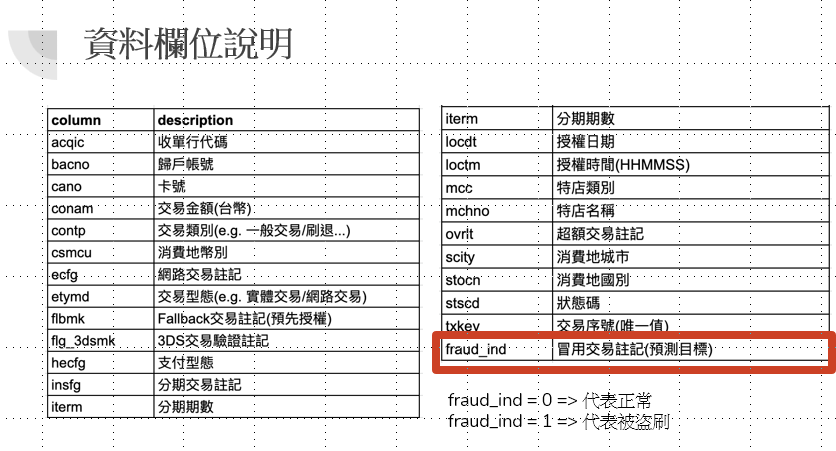

In [ ]:
f1id = '1SvJ_IiHr-ndJDG_sBf6NCn0lMKUxPIlf'
f2id = '1lZPv46zul32Xbr1qHES66YRzMa-A7MzB'

!pip3 install gdown
import gdown
url = 'https://drive.google.com/uc?id=%s'%(f1id)
output = 'train.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SvJ_IiHr-ndJDG_sBf6NCn0lMKUxPIlf
To: /content/train.csv
132MB [00:01, 75.0MB/s]


'train.csv'

In [ ]:
import sys

import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('train.csv', newline="") as f:
  TrainData = np.array(list(csv.reader(f, delimiter=',')))
DataNames = TrainData[0]
DataChineseNames = ["收單行代碼", "歸戶帳號", "卡號", "交易金額", "交易類別", "消費地幣別", 
            "網路交易註記", "交易型態", "Fallback註記", "3DS註記", "盜用註記", 
            "支付型態", "分期交易註記", "分期期數", "授權日期", "授權時間",
            "特店類別", "特店名稱", "超額交易註記", "消費地城市", "消費地國別",
            "狀態碼", "交易序號"]
DataNamesDict = dict(zip(DataNames, DataChineseNames))
print(DataNamesDict)
TrainData = TrainData[1:]
for i in range(len(TrainData)):
  for j in range(len(TrainData[i])):
    if TrainData[i][j] == 'Y':
      TrainData[i][j] = 1
    elif TrainData[i][j] == 'N':
      TrainData[i][j] = 0
    elif TrainData[i][j] == "":
      TrainData[i][j] = -1
print(f'TrainData:{TrainData[:3]}...')
TrainData = TrainData.astype(np.float64)

{'acqic': '收單行代碼', 'bacno': '歸戶帳號', 'cano': '卡號', 'conam': '交易金額', 'contp': '交易類別', 'csmcu': '消費地幣別', 'ecfg': '網路交易註記', 'etymd': '交易型態', 'flbmk': 'Fallback註記', 'flg_3dsmk': '3DS註記', 'fraud_ind': '盜用註記', 'hcefg': '支付型態', 'insfg': '分期交易註記', 'iterm': '分期期數', 'locdt': '授權日期', 'loctm': '授權時間', 'mcc': '特店類別', 'mchno': '特店名稱', 'ovrlt': '超額交易註記', 'scity': '消費地城市', 'stocn': '消費地國別', 'stscd': '狀態碼', 'txkey': '交易序號'}
TrainData:[['6881' '113261' '38038' '513.8' '5' '0' '0' '0' '0' '0' '0' '5' '0' '0'
  '33' '172652.0' '457' '59333' '0' '0' '102' '0' '516056']
 ['0' '134508' '45725' '465.62' '5' '0' '0' '2' '0' '0' '0' '0' '0' '0'
  '9' '105114.0' '451' '0' '0' '5817' '102' '0' '4376']
 ['6881' '15408' '188328' '513.8' '5' '0' '0' '0' '0' '0' '0' '5' '0' '0'
  '6' '152458.0' '457' '59333' '0' '0' '102' '0' '483434']]...


# 圖表

## Features的值域

In [ ]:
from pprint import pprint
DataUniqueValues=[]
for i in range(len(DataNames)):
  print(f'{DataChineseNames[i]}:')
  u = np.unique(TrainData[:, i])
  pprint(u)
  DataUniqueValues.append(u)

收單行代碼:
array([0.000e+00, 1.000e+00, 2.000e+00, ..., 6.882e+03, 6.883e+03,
       6.884e+03])
歸戶帳號:
array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 1.63882e+05,
       1.63883e+05, 1.63884e+05])
卡號:
array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 2.13328e+05,
       2.13329e+05, 2.13334e+05])
交易金額:
array([0.00000e+00, 1.00000e-02, 2.00000e-02, ..., 6.93647e+03,
       7.19584e+03, 7.20877e+03])
交易類別:
array([0., 1., 2., 3., 4., 5., 6.])
消費地幣別:
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 59., 60., 61., 62., 63., 64., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75.])
網路交易註記:
array([0., 1.])
交易型態:
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
Fallback註記:
array([-1.,  0.,  1.])
3DS註記:
array([-1.

## Missing Value

In [ ]:
from dataclasses import make_dataclass
missing_value_dict = {'Name':DataChineseNames}
missing_value_ratio = []
for i in range(len(DataNames)):
  missing_value_ratio.append(f'{(TrainData[:, i]==-1).sum()/len(TrainData)*100:.2f}%')
missing_value_dict['missing value ratio(%)'] = missing_value_ratio
missing_value_table = pd.DataFrame(missing_value_dict)
missing_value_table.style.applymap(lambda x:'color: green')

,Name,missing value ratio(%)
0,收單行代碼,0.00%
1,歸戶帳號,0.00%
2,卡號,0.00%
3,交易金額,0.00%
4,交易類別,0.00%
5,消費地幣別,0.00%
6,網路交易註記,0.00%
7,交易型態,0.00%
8,Fallback註記,0.83%
9,3DS註記,0.83%


## 盜刷比例

In [ ]:
NumOfFraud = (TrainData[:, 10]==1).sum()
print(f"盜刷比例:{NumOfFraud/len(TrainData)*100} %")

盜刷比例:1.3375722095142093 %


## 特徵數量分布


收單行代碼


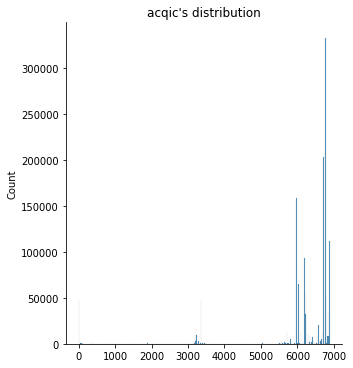

歸戶帳號


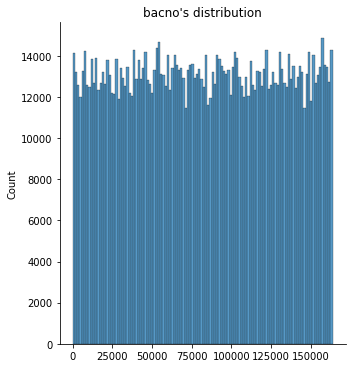

卡號


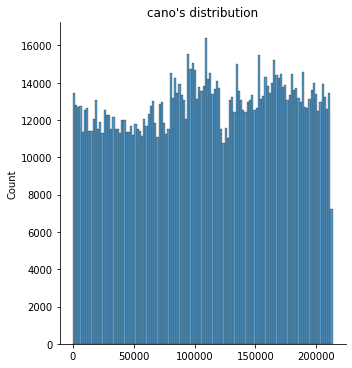

交易金額


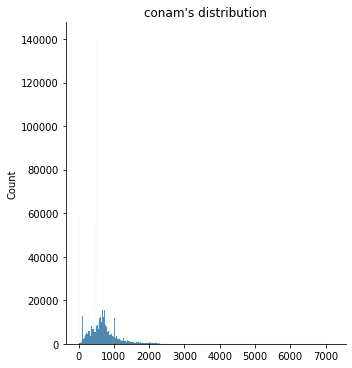

交易類別


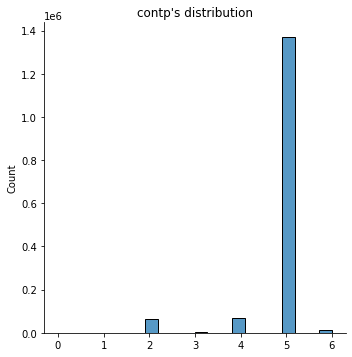

消費地幣別


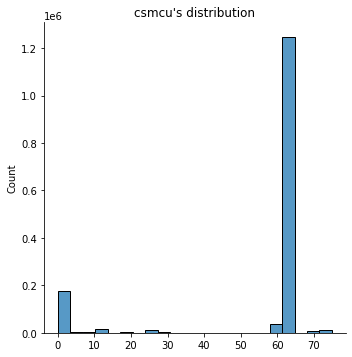

網路交易註記


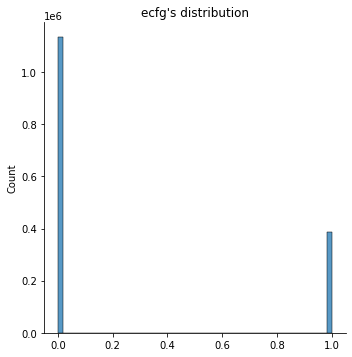

交易型態


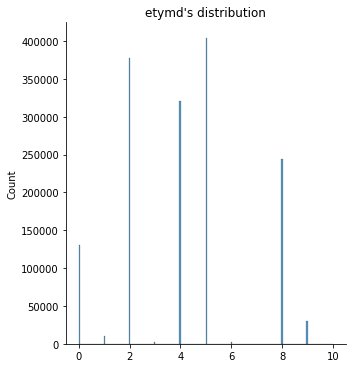

Fallback註記


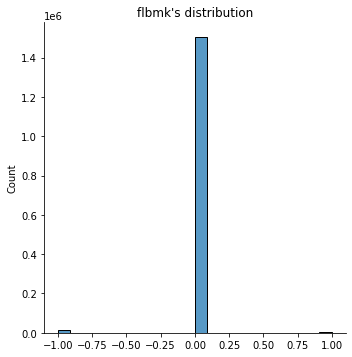

3DS註記


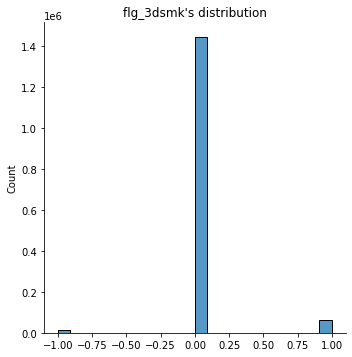

盜用註記


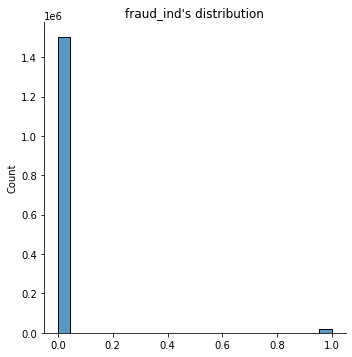

支付型態


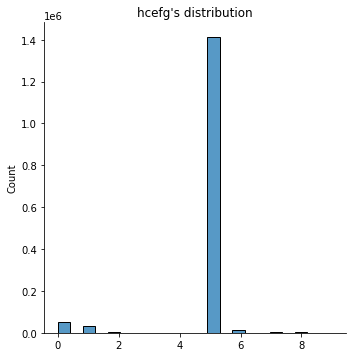

分期交易註記


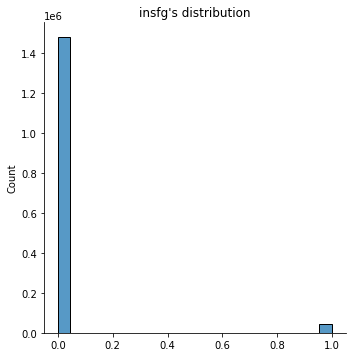

分期期數


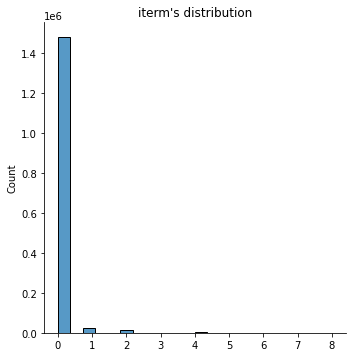

授權日期


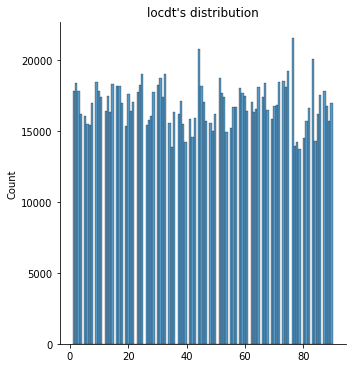

授權時間


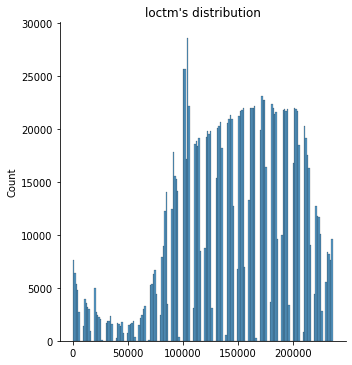

特店類別


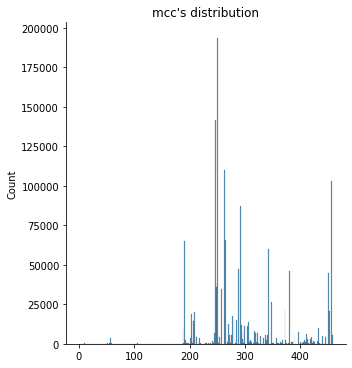

特店名稱


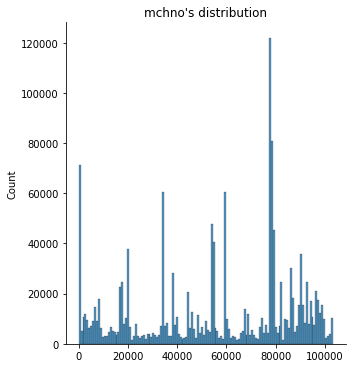

超額交易註記


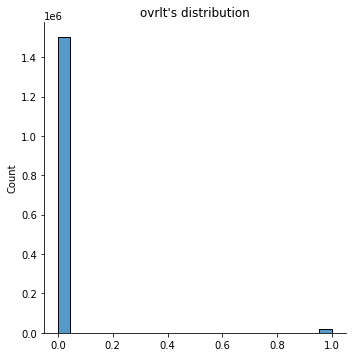

消費地城市


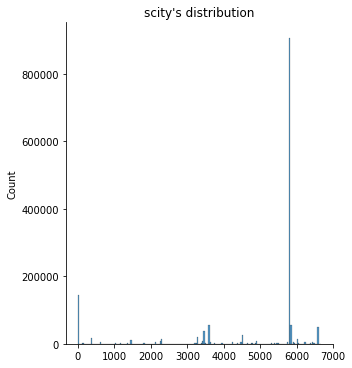

消費地國別


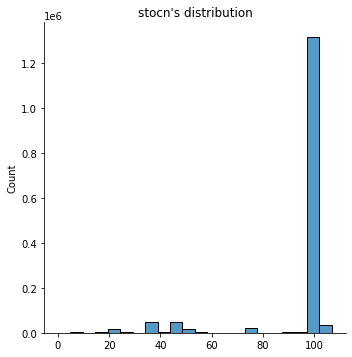

狀態碼


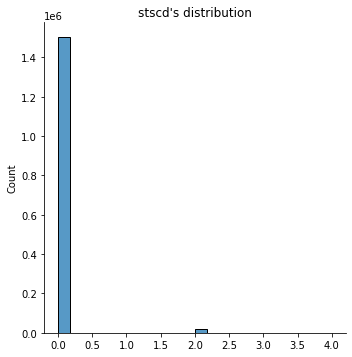

In [ ]:
for i in range(len(DataNames)-1):
  print(DataChineseNames[i])
  sns.displot(data=TrainData[:,i], kind="hist")
  plt.title(f"{DataNames[i]}\'s distribution")
  plt.pause(1e-3)
plt.show()

## 各個特徵的盜刷數量分布



收單行代碼


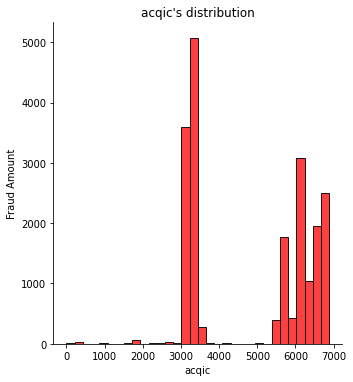

歸戶帳號


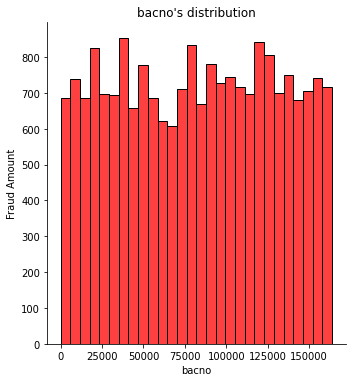

卡號


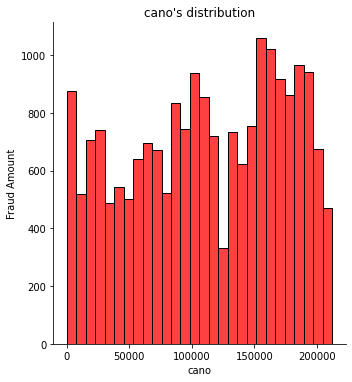

交易金額


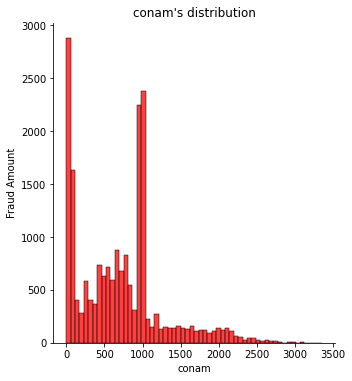

交易類別


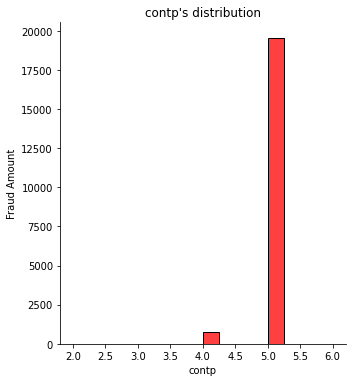

消費地幣別


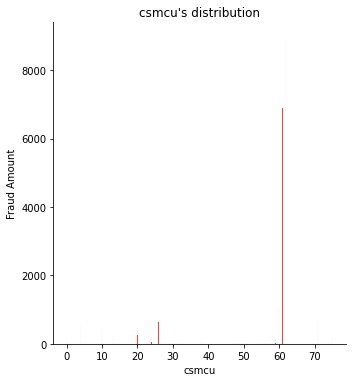

網路交易註記


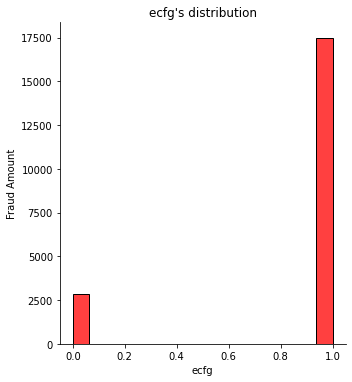

交易型態


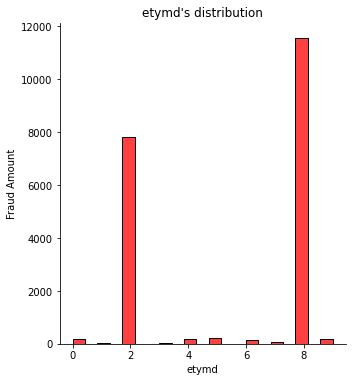

Fallback註記


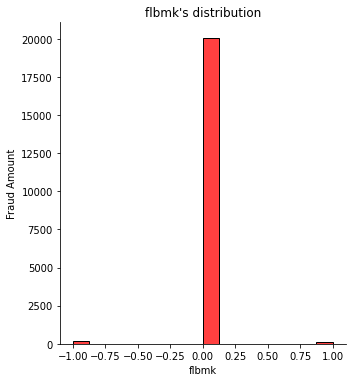

3DS註記


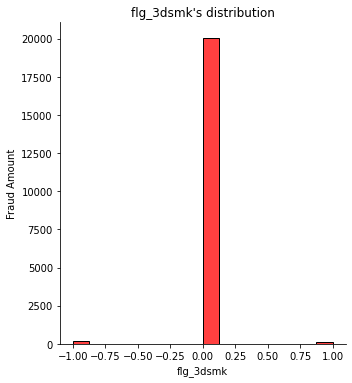

盜用註記


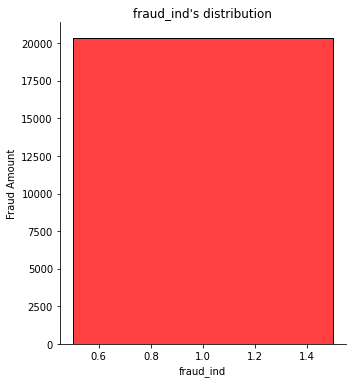

支付型態


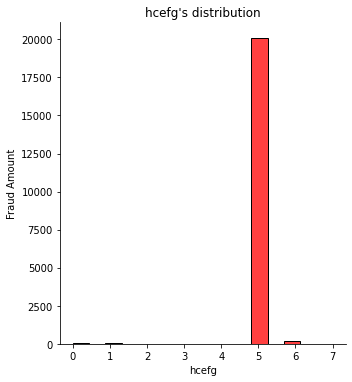

分期交易註記


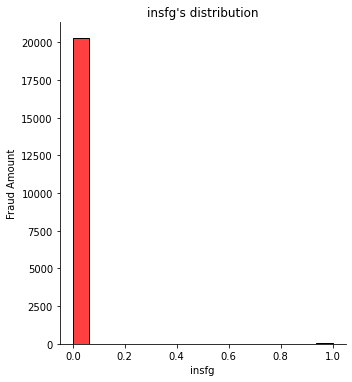

分期期數


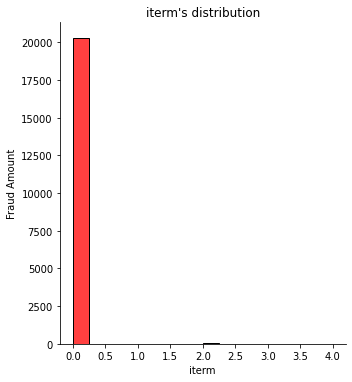

授權日期


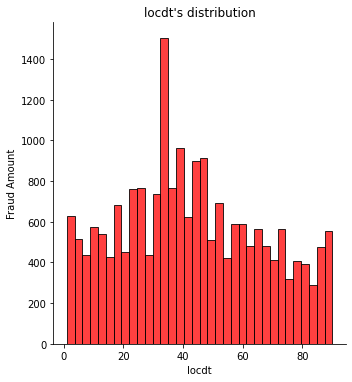

授權時間


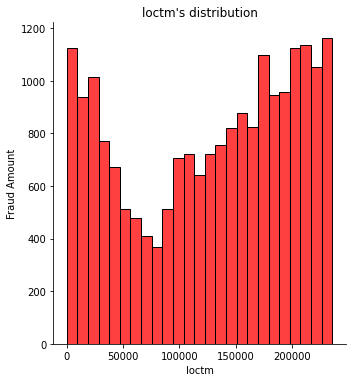

特店類別


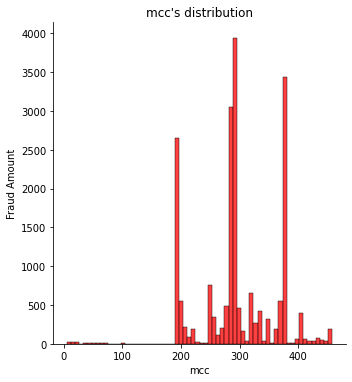

特店名稱


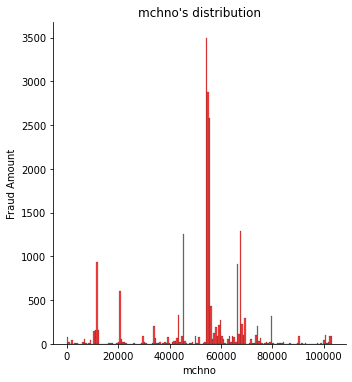

超額交易註記


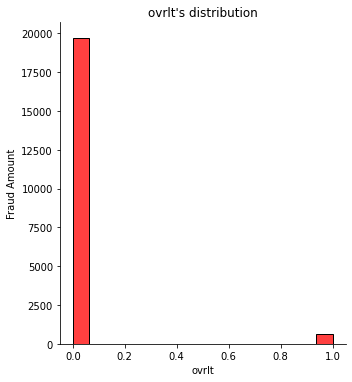

消費地城市


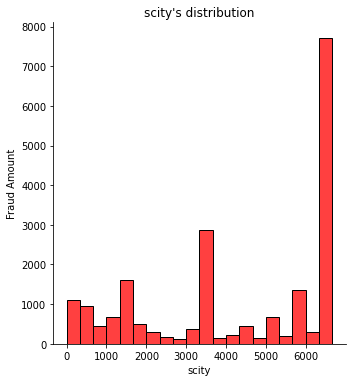

消費地國別


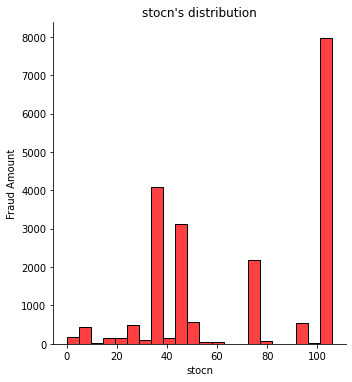

狀態碼


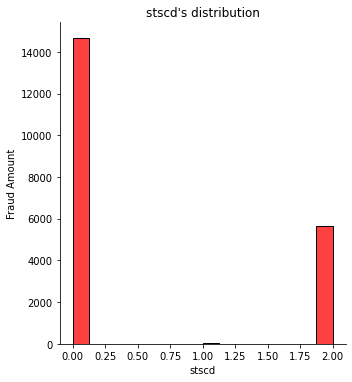

In [ ]:
FraudIndex = 10
for i in range(len(DataNames)-1):
  fraud = [TrainData[row,i] for row in range(len(TrainData))
        if TrainData[row,FraudIndex] == 1]
  print(DataChineseNames[i])
  sns.displot(fraud, kind="hist", color='red')
  plt.xlabel(f'{DataNames[i]}')
  plt.ylabel(f'Fraud Amount')
  plt.title(f'{DataNames[i]}\'s distribution')
  plt.pause(1e-3)
plt.show()

## 各個特徵盜刷比例與特徵值的關係
即對feature $f_n$, $\frac{\text{num of (}f_n=v\ \text{and is fraud})}{\text{num of (}f_n=v)}$

有畫的特徵:
收單行代碼
交易類別
消費地幣別
網路交易註記
交易型態
Fallback註記
3DS註記
盜用註記
支付型態
分期交易註記
分期期數
授權日期
特店類別
超額交易註記
消費地城市
消費地國別
狀態碼
收單行代碼
len:6051


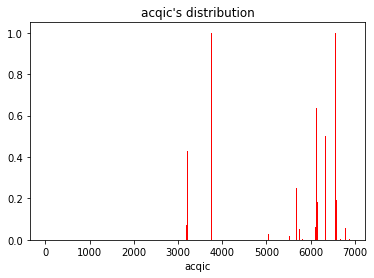

交易類別
len:7


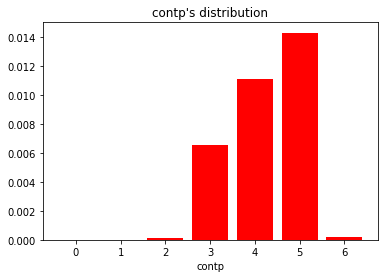

消費地幣別
len:72


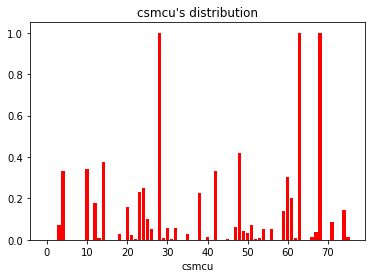

網路交易註記
len:2


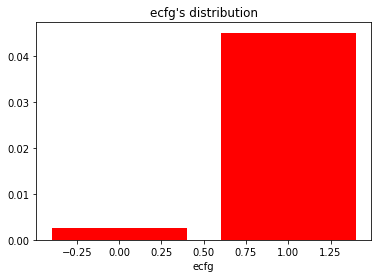

交易型態
len:11


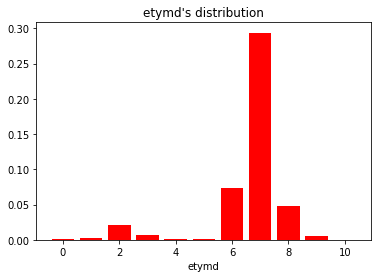

Fallback註記
len:3


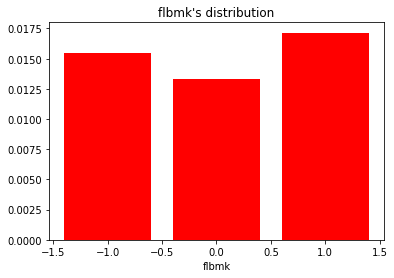

3DS註記
len:3


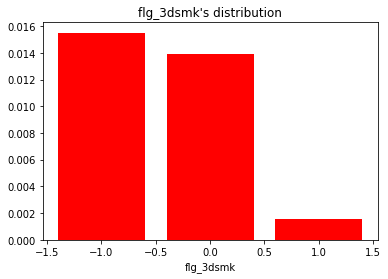

盜用註記
len:2


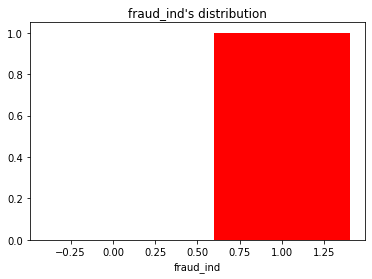

支付型態
len:9


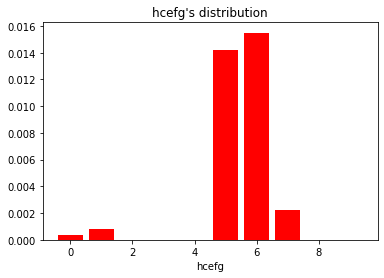

分期交易註記
len:2


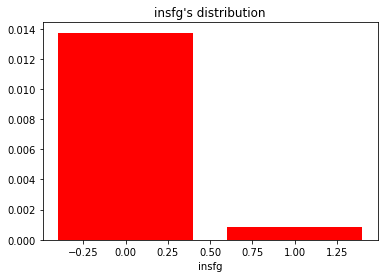

分期期數
len:9


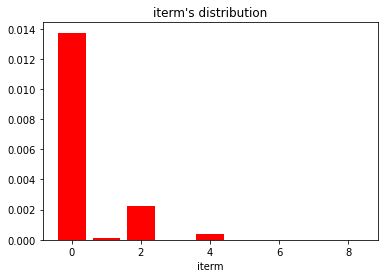

授權日期
len:90


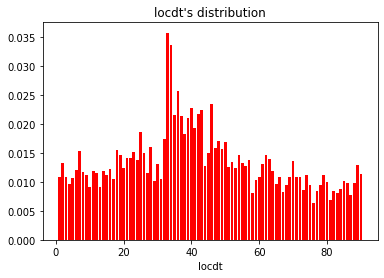

特店類別
len:434


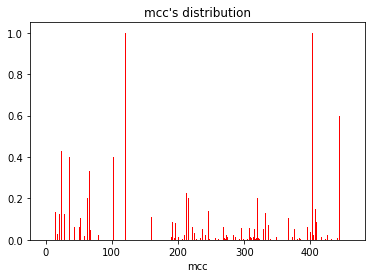

超額交易註記
len:2


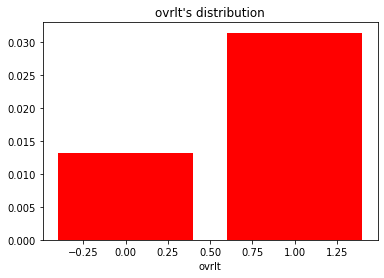

消費地城市
len:5698


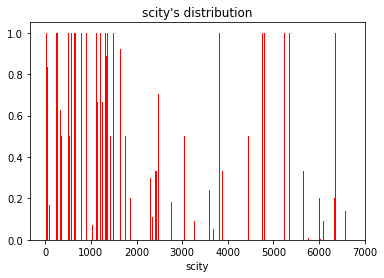

消費地國別
len:103


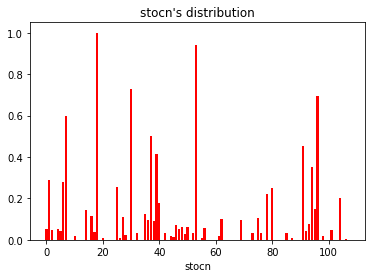

狀態碼
len:5


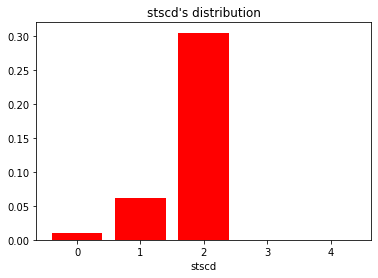

In [ ]:
plot_indices = [0,4,5,6,7,8,9,10,11,12,13,14,16,18,19,20,21]
#plot_indices = [7, 14, 15]
print("有畫的特徵:")
for idx in plot_indices:
  print(DataChineseNames[idx])
total_cnt = [dict(zip(DataUniqueValues[i], [0 for j in range(len(DataUniqueValues[i]))])) 
        for i in range(len(DataUniqueValues)) ]
fraud_cnt = [dict(zip(DataUniqueValues[i], [0 for j in range(len(DataUniqueValues[i]))])) 
        for i in range(len(DataUniqueValues))]
fraud_ratio = [dict(zip(DataUniqueValues[i], [0 for j in range(len(DataUniqueValues[i]))]))
        for i in range(len(DataUniqueValues))]

for data in TrainData:
  for i in plot_indices:
    total_cnt[i][data[i]] += 1
    if data[FraudIndex] == 1:
      fraud_cnt[i][data[i]] += 1
for i in plot_indices:
  for value in DataUniqueValues[i]:
    fraud_ratio[i][value] = fraud_cnt[i][value] / total_cnt[i][value]

for i in plot_indices:
  print(DataChineseNames[i])
  print(f'len:{len(DataUniqueValues[i])}')
  Data={'x':DataUniqueValues[i],'y':list(fraud_ratio[i].values())}
  plt.bar(Data["x"], Data["y"], color='red')
  #sns.lineplot(x="x", y="y", data=data)
  plt.xlabel(f'{DataNames[i]}')
  plt.title(f'{DataNames[i]}\'s distribution')
  plt.pause(1e-3)
plt.show()

## 帳號持卡數量與盜刷的關係




持卡數量與盜刷的關係


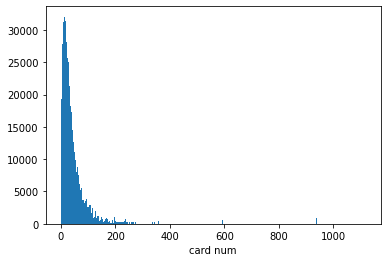

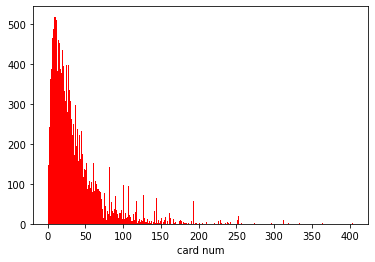

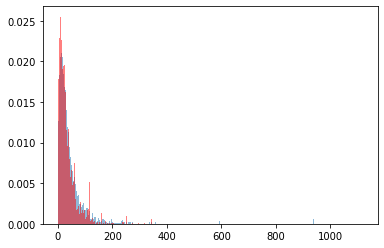

In [ ]:
bacno_index = 1
cano_index = 2
bacno_cnt = dict(zip(DataUniqueValues[bacno_index], 
          [0 for i in range(len(DataUniqueValues[bacno_index]))]))
for data in TrainData:
  bacno_cnt[data[bacno_index]] += 1
card_total_dis = []
card_fraud_dis = []

for data in TrainData:
  card_total_dis.append(bacno_cnt[data[bacno_index]])
  if data[FraudIndex]:
    card_fraud_dis.append(bacno_cnt[data[bacno_index]])

print(f'持卡數量與盜刷的關係')
plt.hist(card_total_dis, bins=int(max(card_total_dis)))
plt.xlabel(f'card num')
plt.show()
plt.hist(card_fraud_dis, bins=int(max(card_fraud_dis)),color='red')
plt.xlabel(f'card num')
plt.show()
plt.hist(card_total_dis, bins=int(max(card_total_dis)), alpha=0.5, density=True)
plt.hist(card_fraud_dis, bins=int(max(card_fraud_dis)), alpha=0.5, color='red', density=True)
plt.show()

## 卡號消費地數量與盜刷的關係
卡在多少國家消費過

到訪國家數量與盜刷的關係


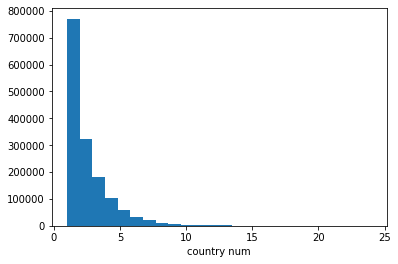

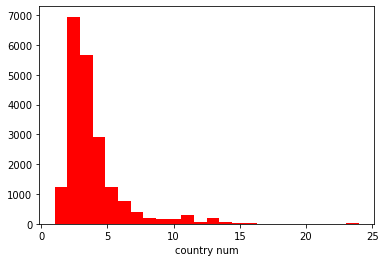

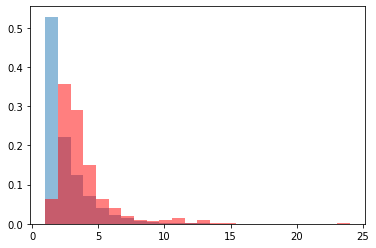

In [ ]:
bacno_index = 1
country_index = 20
card_country_record = dict(zip(DataUniqueValues[bacno_index], 
              [[] for i in range(len(DataUniqueValues[bacno_index]))]))
for data in TrainData:
  if not data[country_index] in card_country_record[data[bacno_index]]:
    card_country_record[data[bacno_index]].append(data[country_index])
card_country_cnt = dict()
for card,countries in card_country_record.items():
  card_country_cnt[card] = len(countries)
country_dis_total=[]
country_dis_fraud=[]
for data in TrainData:
  country_dis_total.append(card_country_cnt[data[bacno_index]])
  if data[FraudIndex]:
    country_dis_fraud.append(card_country_cnt[data[bacno_index]])

print(f'到訪國家數量與盜刷的關係')
plt.hist(country_dis_total, bins=int(max(country_dis_total)))
plt.xlabel(f'country num')
plt.show()
plt.hist(country_dis_fraud, bins=int(max(country_dis_fraud)), color='red')
plt.xlabel(f'country num')
plt.show()
plt.hist(country_dis_total, bins=int(max(country_dis_total)), alpha=0.5, density=True)
plt.hist(country_dis_fraud, bins=int(max(country_dis_fraud)), alpha=0.5, color='red', density=True)
plt.show()


## 到訪城市數量與盜刷的關係

到訪城市數量與盜刷的關係


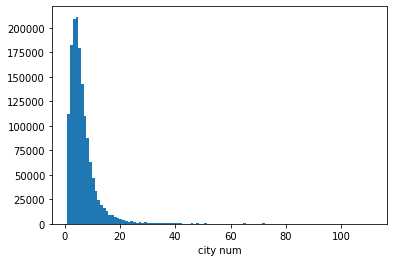

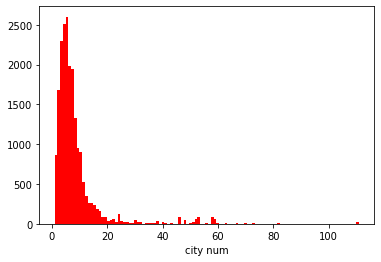

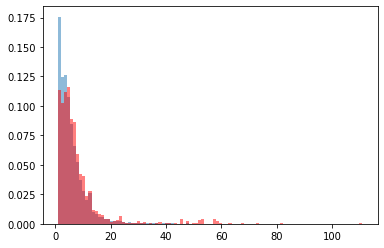

In [ ]:
bacno_index = 1
city_index = 19
card_city_record = dict(zip(DataUniqueValues[bacno_index], 
              [[] for i in range(len(DataUniqueValues[bacno_index]))]))
for data in TrainData:
  if not data[city_index] in card_city_record[data[bacno_index]]:
    card_city_record[data[bacno_index]].append(data[city_index])
card_city_cnt = dict()
for card,countries in card_city_record.items():
  card_city_cnt[card] = len(countries)
city_dis_total=[]
city_dis_fraud=[]
for data in TrainData:
  city_dis_total.append(card_city_cnt[data[bacno_index]])
  if data[FraudIndex]:
    city_dis_fraud.append(card_city_cnt[data[bacno_index]])

print(f'到訪城市數量與盜刷的關係')
plt.hist(city_dis_total, bins=int(max(city_dis_total)))
plt.xlabel(f'city num')
plt.show()
plt.hist(city_dis_fraud, bins=int(max(city_dis_fraud)), color='red')
plt.xlabel(f'city num')
plt.show()
plt.hist(city_dis_total, bins=100, alpha=0.5, density=True)
plt.hist(city_dis_fraud, bins=100, alpha=0.5, color='red', density=True)
plt.show()


## Correlation

# 總結

In [ ]:
def contrast(idx):
  normal = [TrainData[row,idx] for row in range(len(TrainData))
       if TrainData[row,FraudIndex] == 0]
  fraud = [TrainData[row,idx] for row in range(len(TrainData))
       if TrainData[row,FraudIndex] == 1]
  plt.hist(normal, bins=int(min(max(normal), 100))+1, alpha=0.5, density=True)
  plt.hist(fraud, bins=int(min(max(fraud), 100))+1, alpha=0.5,color='red', density=True)
#  plt.hist(normal, alpha=0.5,density=True)
#  plt.hist(fraud, alpha=0.5,color='red', density=True)

  plt.pause(1e-3)
  plt.show()  

## 網路交易盜刷比例較高

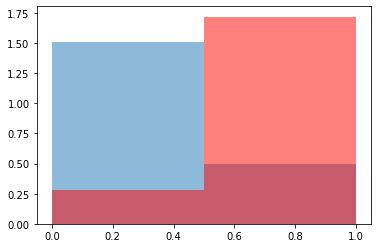

In [ ]:
contrast(6)

## 分期交易與盜刷無關

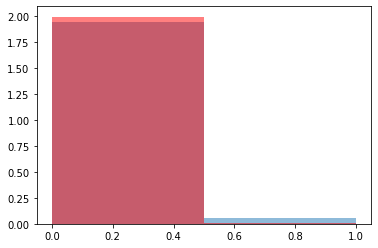

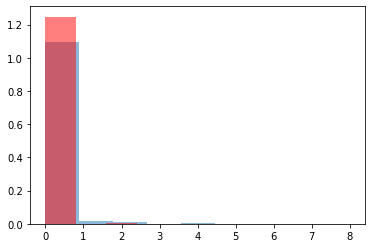

In [ ]:
contrast(12)
contrast(13)

## 狀態碼2在盜刷中佔比比正常交易高

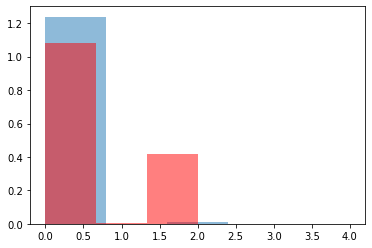

In [ ]:
contrast(21)

## 清晨盜刷比例較高

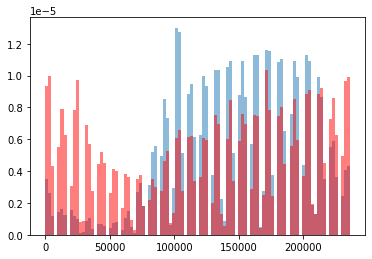

In [ ]:
contrast(15)

## 交易金額
非正相關或負相關

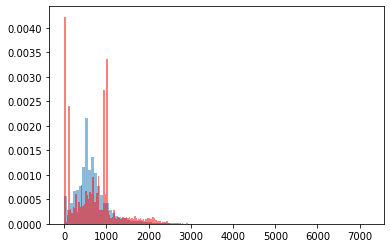

In [ ]:
contrast(3)

## 超額交易註記

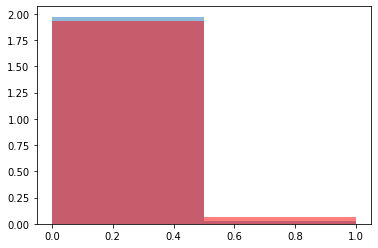

In [ ]:
contrast(18)

## 支付型態

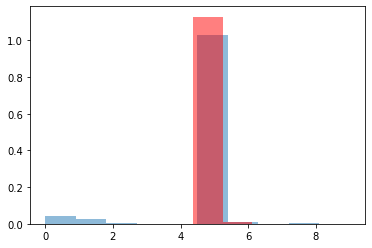

In [ ]:
contrast(11)